In [6]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import *
from scipy.optimize import broyden1

# plot configuration
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 10, 5

## Part I

![alt text](images/task_5.1.png "")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Static points (x, y >= 0)
[0 0]
[2. 0.]
[200.  20.]


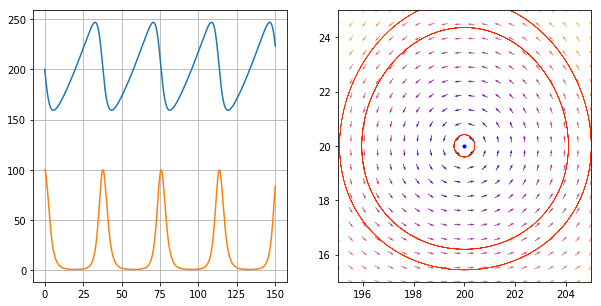

In [12]:
x0 = array([200, 100])
gamma = [0.001, 0.01]
eps = [0.02, 2]


def f(n, t=0):
    return [
        eps[0] * n[0] - gamma[0] * n[0] * n[1],
        -eps[1] * n[1] + gamma[1] * n[0] * n[1]
    ]


t = linspace(0, 150,  10000)


N, infodict = odeint(f, x0, t, full_output=True)
# print(infodict['message'])

N_rabbits, N_foxes = [], []
for x, y in N:
    N_rabbits.append(x)
    N_foxes.append(y)

plt.figure('Task 1')
plt.subplot(1, 2, 1)
curves = plt.plot(t, N_rabbits, t, N_foxes)
plt.grid()

x_n1 = array([eps[1] / gamma[1], eps[0] / gamma[0]])


values = linspace(0.1, 1.2, 50)
vcolors = plt.cm.autumn_r(linspace(0.1, 1, len(values)))

plt.subplot(1, 2, 2)

# trajectories
for v, col in zip(values, vcolors):
    P0 = [E * v for E in x_n1]
    P = odeint(f, P0, t)
    plt.plot( P[:, 0], P[:, 1], lw=0.5*v, color=col, label='P0=(%.f, %.f)' % ( P0[0], P0[1]))


ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]

# Define number of points
nb_points = 20

# Define x and y ranges
x = linspace(x_n1[0] - 5, x_n1[0] + 5, nb_points)
y = linspace(x_n1[1] - 5, x_n1[1] + 5, nb_points)

# Create meshgrid
X1 , Y1 = meshgrid(x,y)

# Calculate growth rate at each grid point
DX1, DY1 = f([X1, Y1], 0)

# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (hypot(DX1, DY1))

# This is to avoid any divisions when normalizing
M[M == 0] = 1.

# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.plot([x_n1[0]], [x_n1[1]], marker='o', markersize=3, color="blue")

plt.xlim([x_n1[0] - 5, x_n1[0] + 5])
plt.ylim([x_n1[1] - 5, x_n1[1] + 5])

print('Static points (x, y >= 0)')
print(array([0, 0]))
print(x_n1)

plt.show()

## Part II

![alt text](images/task_5.2.png "")

Static points (x, y >= 0)
[0 0]
[20.  0.]
[0.5    0.4875]


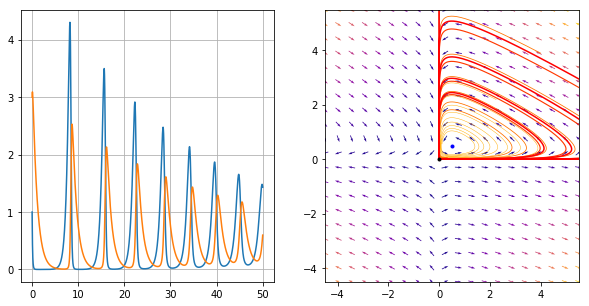

In [8]:
x0 = array([1, 3])
gamma = [4, 2]
eps = [2, 1]
alpha = 0.1


def f(n, t=0):
    return [
        (eps[0] - gamma[0] * n[1] - alpha * n[0]) * n[0],
        n[1] * (gamma[1] * n[0] - eps[1])
    ]


t = linspace(0, 50,  10000)


N, infodict = odeint(f, x0, t, full_output=True)
# print(infodict['message'])

N_rabbits, N_foxes = [], []
for x, y in N:
    N_rabbits.append(x)
    N_foxes.append(y)

plt.figure('Task 2')
plt.subplot(1, 2, 1)
curves = plt.plot(t, N_rabbits, t, N_foxes)
plt.grid()

x_n1 = array([eps[1] / gamma[1], (eps[0] * gamma[1] - alpha * eps[1]) / (gamma[0] * gamma[1])])

values = linspace(1, 15, 5)
vcolors = plt.cm.autumn_r(linspace(0.1, 1, len(values)))

plt.subplot(1, 2, 2)
# trajectories
for v, col in zip(values, vcolors):
    P0 = [E * v for E in x_n1]
    P = odeint(f, P0, t)
    plt.plot( P[:, 0], P[:, 1], lw=0.1*v, color=col, label='P0=(%.f, %.f)' % ( P0[0], P0[1]))


ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]

# Define number of points
nb_points = 20

# Define x and y ranges
x = linspace(x_n1[0] - 5, x_n1[0] + 5, nb_points)
y = linspace(x_n1[1] - 5, x_n1[1] + 5, nb_points)

# Create meshgrid
X1 , Y1 = meshgrid(x,y)

# Calculate growth rate at each grid point
DX1, DY1 = f([X1, Y1], 0)

# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (hypot(DX1, DY1))

# This is to avoid any divisions when normalizing
M[M == 0] = 1.

# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.plot([x_n1[0]], [x_n1[1]], marker='o', markersize=3, color="blue")
plt.plot([0], [0], marker='o', markersize=3, color="black")
plt.plot([eps[0] / alpha], [0], marker='o', markersize=3, color="black")

plt.xlim([x_n1[0] - 5, x_n1[0] + 5])
plt.ylim([x_n1[1] - 5, x_n1[1] + 5])

print('Static points (x, y >= 0)')
print(array([0, 0]))
print(array([eps[0] / alpha, 0]))
print(x_n1)

plt.show()

## Part III

![alt text](images/task_5.3.png "")

Static points (x, y >= 0)
[0 0]
[1.66666667 0.        ]
[0.41501976 0.75098814]


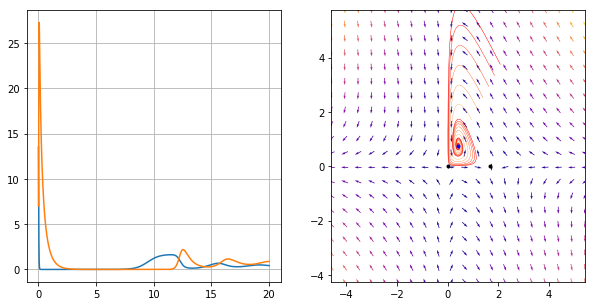

In [9]:
x0 = array([13.5, 7])
gamma = [[2, 1.2],
         [5, 0.1]]
eps = [2, 2]


def f(n, t=0):
    return [
        (eps[0] - gamma[0][0] * n[1] - gamma[0][1] * n[0]) * n[0],
        (-eps[1] + gamma[1][0] * n[0] - gamma[1][1] * n[1]) * n[1]
    ]


t = linspace(0, 20,  10000)


N, infodict = odeint(f, x0, t, full_output=True)
# print(infodict['message'])

N_rabbits, N_foxes = [], []
for x, y in N:
    N_rabbits.append(x)
    N_foxes.append(y)

plt.figure('Task 3')
plt.subplot(1, 2, 1)
curves = plt.plot(t, N_rabbits, t, N_foxes)
plt.grid()


x_n1 = broyden1(f, [1, 1], f_tol=1e-14)
values = linspace(0.1, 5, 10)
vcolors = plt.cm.autumn_r(linspace(0.1, 1, len(values)))

plt.subplot(1, 2, 2)
# trajectories
for v, col in zip(values, vcolors):
    P0 = [E * v for E in x_n1]
    P = odeint(f, P0, t)
    plt.plot( P[:, 0], P[:, 1], lw=0.1*v, color=col, label='P0=(%.f, %.f)' % ( P0[0], P0[1]))


ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]

# Define number of points
nb_points = 20

# Define x and y ranges
x = linspace(x_n1[0] - 5, x_n1[0] + 5, nb_points)
y = linspace(x_n1[1] - 5, x_n1[1] + 5, nb_points)

# Create meshgrid
X1 , Y1 = meshgrid(x,y)

# Calculate growth rate at each grid point
DX1, DY1 = f([X1, Y1], 0)

# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (hypot(DX1, DY1))

# This is to avoid any divisions when normalizing
M[M == 0] = 1.

# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.plot([x_n1[0]], [x_n1[1]], marker='o', markersize=3, color="blue")
plt.plot([0], [0], marker='o', markersize=3, color="black")
plt.plot([eps[0] / gamma[0][1]], [0], marker='o', markersize=3, color="black")

plt.xlim([x_n1[0] - 5, x_n1[0] + 5])
plt.ylim([x_n1[1] - 5, x_n1[1] + 5])

print('Static points (x, y >= 0)')
print(array([0, 0]))
print(array([eps[0] / gamma[0][1], 0]))
print(x_n1)


plt.show()

## Part IV

![alt text](images/task_5.4.png "")

Static points (x, y >= 0)
[0 0]
[3.72972973 0.        ]
[30.81048167 31.6574611 ]


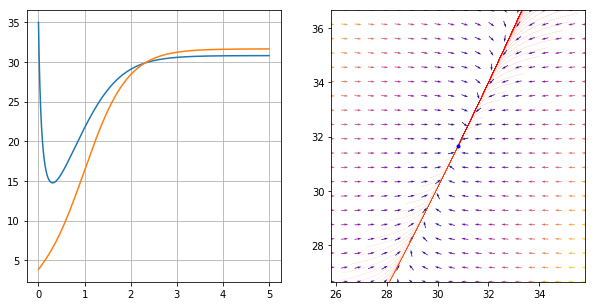

In [10]:
x0 = array([35, 3.857])
gamma = [0.37, 0.07]
alpha = [-5.68, 1.78]
beta = 0.55
eps = [1.38, 0.84]


def f(n, t=0):
    return [
        n[0] * (eps[0] - gamma[0] * n[0]) - (alpha[0] * n[0] * n[1]) / (1 + beta * n[0]),
        -n[1] * (eps[1] + gamma[1] * n[1]) + (alpha[1] * n[0] * n[1]) / (1 + beta * n[0])
    ]


t = linspace(0, 5,  10000)


N, infodict = odeint(f, x0, t, full_output=True)
# print(infodict['message'])

N_rabbits, N_foxes = [], []
for x, y in N:
    N_rabbits.append(x)
    N_foxes.append(y)

plt.figure('Task 4')
plt.subplot(1, 2, 1)
curves = plt.plot(t, N_rabbits, t, N_foxes)
plt.grid()


x_n1 = broyden1(f, [10, 10])  # or you can just wolfram your equation

values = linspace(0.5, 2, 150)
vcolors = plt.cm.autumn_r(linspace(0.7, 1, len(values)))

plt.subplot(1, 2, 2)

# trajectories
for v, col in zip(values, vcolors):
    P0 = [E * v for E in x_n1]
    P = odeint(f, P0, t)
    plt.plot( P[:, 0], P[:, 1], lw=0.1*v, color=col, label='P0=(%.f, %.f)' % ( P0[0], P0[1]))


ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]

# Define number of points
nb_points = 20

# Define x and y ranges
x = linspace(x_n1[0] - 5, x_n1[0] + 5, nb_points)
y = linspace(x_n1[1] - 5, x_n1[1] + 5, nb_points)

# Create meshgrid
X1 , Y1 = meshgrid(x,y)

# Calculate growth rate at each grid point
DX1, DY1 = f([X1, Y1], 0)

# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (hypot(DX1, DY1))

# This is to avoid any divisions when normalizing
M[M == 0] = 1.

# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.plot([x_n1[0]], [x_n1[1]], marker='o', markersize=3, color="blue")
plt.plot([0], [0], marker='o', markersize=3, color="black")
plt.plot([eps[0] / gamma[0]], [0], marker='o', markersize=3, color="black")

plt.xlim([x_n1[0] - 5, x_n1[0] + 5])
plt.ylim([x_n1[1] - 5, x_n1[1] + 5])

print('Static points (x, y >= 0)')
print(array([0, 0]))
print(array([eps[0] / gamma[0], 0]))
print(x_n1)

plt.show()